In [ ]:
#z score
import numpy as np
data=[1,2,2,3,1,1,15,2,2,2,3,1,1,2]
mean=np.mean(data)
std=np.std(data)
print('mean of the dataset is',mean)
print('std.deviation is',std)
threshold=3
outlier=[]
for i in data:
  z=(i-mean)/std
  if z>threshold:
     outlier.append(i)
print('outlier in dataset is',outlier)

mean of the dataset is 2.7142857142857144
std.deviation is 3.4729273660409197
outlier in dataset is [15]



IQR--qr is used to measure variability by dividing a data set into quartiles

Q1-25th percentile the data, Q2-50th, Q3-75th

if a dataset has 2n/2n+1 datapoints,the

Q1=meadian of the datapoints

Q2=median of n smallest datapoints

Q3=median of n highest datapoints

IQR=Q3-Q1

In [ ]:
import numpy as np
import seaborn as sns
d=[6,2,3,4,5,1,10]
sort_d=np.sort(d)
print(sort_d)
Q1=np.percentile(data,25,interpolation='midpoint')
Q2=np.percentile(data,50,interpolation='midpoint')
Q3=np.percentile(data,75,interpolation='midpoint')
print('Q1 25 percentile of the given data is =',Q1)
print('Q2 50 percentile of the given data is =',Q2)
print('Q3 75 percentile of the given data is =',Q3)
IQR=Q3-Q1
print('Interquartile range is =',IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_limit is =',low_lim)
print('up_limit is =',up_lim)

[ 1  2  3  4  5  6 10]
Q1 25 percentile of the given data is = 1.0
Q2 50 percentile of the given data is = 2.0
Q3 75 percentile of the given data is = 2.0
Interquartile range is = 1.0
low_limit is = -0.5
up_limit is = 3.5


outlier in the dataset is [15]


<Axes: >

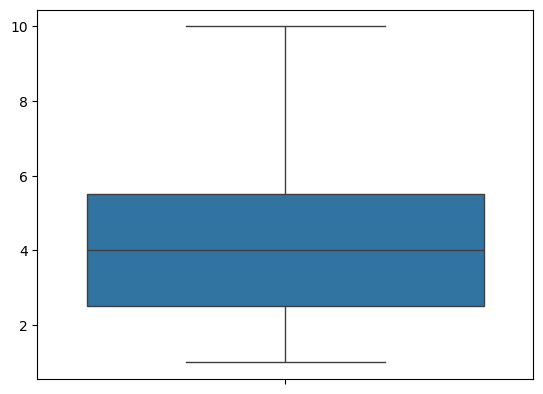

In [ ]:
outlier=[]
for x in data:
   if((x>up_lim) or (x<low_lim)):
     outlier.append(x)
print('outlier in the dataset is',outlier)
sns.boxplot(d)

In [ ]:
import pandas as pd
def load_data():
 df_all=pd.read_csv('/content/train.csv')
 return df_all.loc[:300,['Survived','Pclass','Sex','Cabin','Embarked']]
df=load_data()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [ ]:
df.Cabin.duplicated()

In [ ]:
df.duplicated()

In [ ]:
df.Cabin.duplicated().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.loc[df.duplicated(keep='first'),:]

In [ ]:
df.loc[df.duplicated(keep=False),:]

dimensionality reduction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
d=pd.read_csv("/content/2.2 dataset breast cancer.csv")
d

In [ ]:
breast=load_breast_cancer()
breast_data=breast.data
print(breast_data)
print(breast_data.shape)

In [ ]:
breast_labels=breast.target
print(breast_labels)
print(breast_labels.shape)

In [ ]:
import numpy as np
labels =np.reshape(breast_labels,(569,1))
final_breast_data=np.concatenate([breast_data,labels],axis=1)
print(final_breast_data.shape)

In [ ]:
breast_dataset=pd.DataFrame(final_breast_data)
print(breast_dataset.head())

In [ ]:
features=breast.feature_names
features

In [ ]:
feature_labels=np.append(features,'label')
feature_labels

In [ ]:
breast_dataset.columns=feature_labels
breast_dataset.head()

In [ ]:
breast_dataset['label'].replace(0,'Benign',inplace=True)
breast_dataset['label'].replace(1,'Malignant',inplace=True)
breast_dataset.tail()

In [ ]:
from sklearn.preprocessing import StandardScaler
x=breast_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x)
print(x.shape)

In [ ]:
np.mean(x),np.std(x)

In [ ]:
feat_cols=['feature'+str(i) for i in range(x.shape[1])]
normalised_breast=pd.DataFrame(x,columns=feat_cols)
print(normalised_breast)

In [ ]:
normalised_breast.tail()

In [ ]:
from sklearn.decomposition import PCA
pca_breast=PCA(n_components=2)
principalComponents_breast=pca_breast.fit_transform(x)
principal_breast_Df=pd.DataFrame(data=principalComponents_breast,columns=['principal components 1','principal components 2'])
principal_breast_Df.tail()


In [ ]:
print('Explained variation per principle component:{}'.format(pca_breast.explained_variance_ratio_))

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('principal component - 1',fontsize=20)
plt.xlabel('principal component - 2',fontsize=20)
plt.title('principal component analysis of breast cancer dataset',fontsize=20)
targets=['Benign','Malignant']
colors=['r','g']
for target,color in zip(targets,colors):
  indicesToKeep=breast_dataset['label']==target
  plt.scatter(principal_breast_Df.loc[indicesToKeep,'principal components 1'],
              principal_breast_Df.loc[indicesToKeep,'principal components 2'],c=color,s=50)
  plt.legend(targets,prop={'size':15})

Linear Regression

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df=sns.load_dataset('iris')
sns.pairplot(df,kind="scatter")
plt.show()

In [ ]:
print(df .head())
print(df.tail())

In [ ]:
d=sns.load_dataset('tips')
sns.regplot(x="total_bill",y="tip",data=d)
plt.show()
print(d.head())

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
x=[5,7,8,2,17,2,9,4,11,12,9,6]
y=[99,86,87,88,111,103,87,94,78,77,85,86]

In [ ]:
slope, intercept, r,p,std_err=stats.linregress(x,y)

In [ ]:
def myfunc(x):
 return slope *x+intercept

In [ ]:
mymodel=list(map(myfunc,x))

In [ ]:
plt.scatter(x,y)

In [ ]:
plt.plot(x,mymodel)

In [ ]:
import numpy as np
def estimate_coef(p,q):
  n1=np.size(p)
  mp=np.mean(p)
  mq=np.mean(q)
  ss_pq=np.sum(q*p)-n1*mq*mp
  ss_pp=np.sum(p*p)-n1*mp*mp
  b1=ss_pq/ss_pp
  b0=mp-b1*mp
  return(b0,b1)

def plot_regression_line(p,q,b):
  plt.scatter(p,q,color="m",
                marker="o",s=30)


In [ ]:
mtplt.xlabel('p')
mtplt.ylabel('q')